In [194]:
# Read the file HVA_FedCodes_20190301.csv into pandas dataframe
#The above file is downloaded for the state of Virginia, USA from the 'State Files with Federal Codes’ section of the website:
#https://geonames.usgs.gov/domestic/download_data.htm
# Import pandas 
import pandas as pd 
  
# reading csv file  
df_file=pd.read_csv("HVA_FedCodes_20190301.csv") 
df_file.head()

FEATURE_ID FEATURE_NAME    FEATURE_CLASS CENSUS_CODE CENSUS_CLASS_CODE  \
0     1314481     Waycross  Populated Place       78570                U6   
1     1314481     Waycross  Populated Place       78570                U6   
2     1462355     Achilles  Populated Place         244                U6   
3     1462375        Adria  Populated Place         420                U6   
4     1462395      Alfonso  Populated Place        1016                U6   

   GSA_CODE     OPM_CODE  STATE_NUMERIC STATE_ALPHA  COUNTY_SEQUENCE  \
0       NaN          NaN             47          TN                1   
1       NaN          NaN             51          VA                2   
2      26.0  510026073.0             51          VA                1   
3       NaN          NaN             51          VA                1   
4      45.0  510045103.0             51          VA                1   

   COUNTY_NUMERIC COUNTY_NAME  PRIMARY_LATITUDE  PRIMARY_LONGITUDE  \
0              73     Hawkins         36.593155         -82.648490   
1             169       Scott         36.593155         -82.648490   
2              73  Gloucester         37.280142         -76.440226   
3             185    Tazewell         37.168726         -81.545943   
4             103   Lancaster         37.808749         -76.508008   

  DATE_CREATED DATE_EDITED  
0      5/19/80         NaN  
1      5/19/80         NaN  
2      9/28/79         NaN  
3      9/28/79         NaN  
4      9/28/79         NaN

In [195]:
# Selecting the required 5 columns for the project
df_file_selcols = df_file[["STATE_ALPHA", "COUNTY_NAME", "FEATURE_NAME", "PRIMARY_LATITUDE" ,"PRIMARY_LONGITUDE"]]
df_file_selcols.head()

STATE_ALPHA COUNTY_NAME FEATURE_NAME  PRIMARY_LATITUDE  PRIMARY_LONGITUDE
0          TN     Hawkins     Waycross         36.593155         -82.648490
1          VA       Scott     Waycross         36.593155         -82.648490
2          VA  Gloucester     Achilles         37.280142         -76.440226
3          VA    Tazewell        Adria         37.168726         -81.545943
4          VA   Lancaster      Alfonso         37.808749         -76.508008

In [196]:
# Renaming the columns to have meaningful column names
df_file_selcols.columns = ["State", "County", "Area", "Latitude", "Longitude"]
df_file_selcols.head()

State      County      Area   Latitude  Longitude
0    TN     Hawkins  Waycross  36.593155 -82.648490
1    VA       Scott  Waycross  36.593155 -82.648490
2    VA  Gloucester  Achilles  37.280142 -76.440226
3    VA    Tazewell     Adria  37.168726 -81.545943
4    VA   Lancaster   Alfonso  37.808749 -76.508008

In [197]:
# Filtering the 5 columns for the 3 counties considered for the project namely Henrico', Chesterfield and Richmond City.
df_area=df_file_selcols.loc[df_file_selcols['County'].isin(['Henrico', 
                                                            'Chesterfield', 'Richmond (city)'])]
df_area.reset_index(drop=True, inplace=True)

df_area.head()

State        County          Area   Latitude  Longitude
0    VA  Chesterfield        Beulah  37.424593 -77.470540
1    VA       Henrico  Capitol View  37.475980 -77.390537
2    VA  Chesterfield    Five Forks  37.407371 -77.566933
3    VA       Henrico        Hunton  37.688478 -77.499707
4    VA       Henrico        Laurel  37.642923 -77.508874

In [198]:
#Verifying that the selection involves just the 3 counties that are considered for the project
df_area['County'].unique()

array(['Chesterfield', 'Henrico', 'Richmond (city)'], dtype=object)

In [199]:
# Understanding how many Areas are selected for analysis in the 3 counties
df_area.shape

(190, 5)

In [200]:
# Importing the packages and libraries required for the data analysis

import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [201]:
# Finding the geographical coordinates of Richmond Virginia to be the center of the visualization on a map
address = 'Richmond, VA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Richmond Virginia are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Richmond Virginia are 37.5385087, -77.43428.


In [202]:
# create map of Richmond, VA using latitude and longitude values
map_richmond = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, county, area in zip(df_area['Latitude'], df_area['Longitude'], df_area['County'], df_area['Area']):
    label = '{}, {}'.format(area, county)
    label = folium.Popup(label, parse_html=True)   
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_richmond)  


    
map_richmond

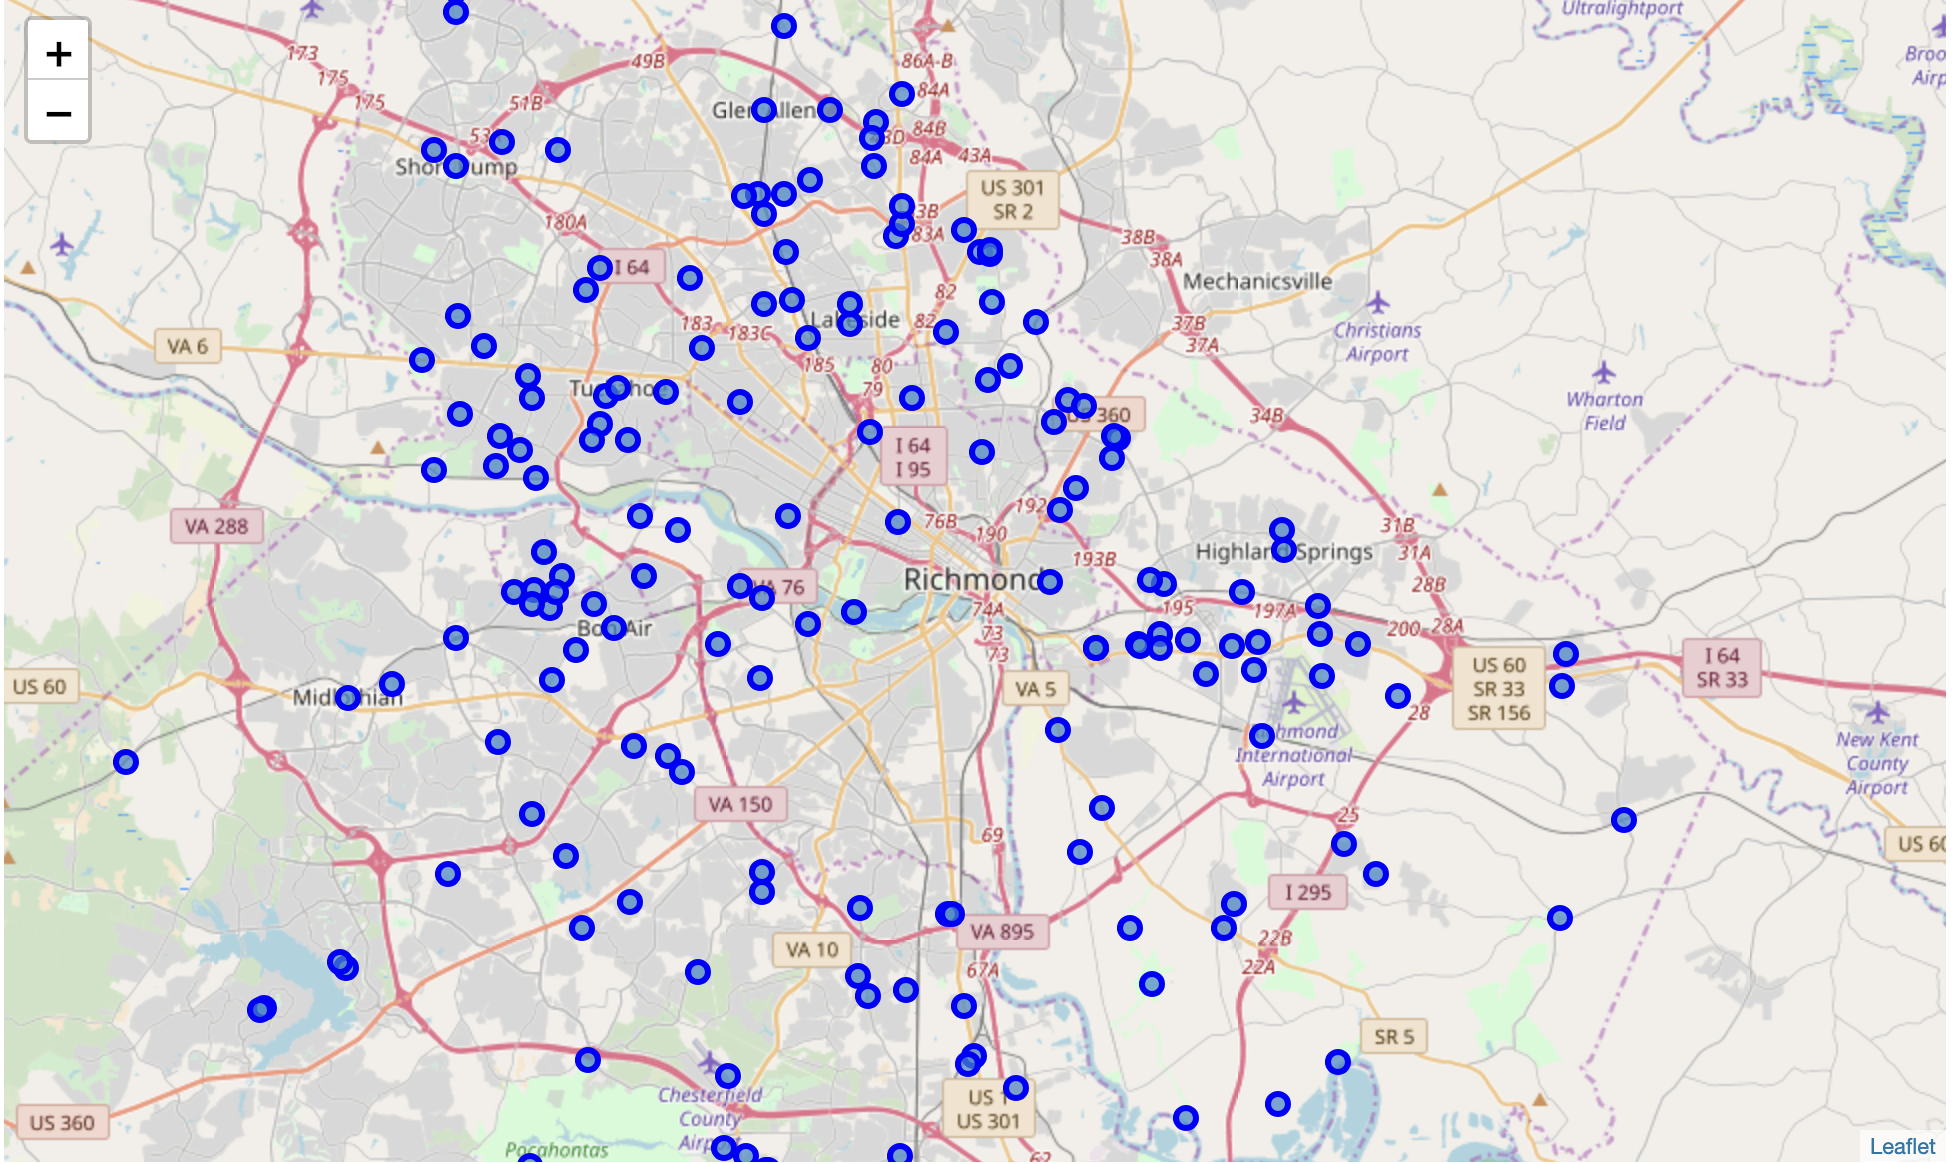

In [203]:
from IPython.display import Image
Image("RichmondLocations.png")

In [204]:
# Moving the FourSquared Credentials to a variable names

CLIENT_ID = '3FLCY0FCIPMBAPYX5XZZVBPJXOTVKOJLMNCFAGCEWV40YCHQ' # your Foursquare ID
CLIENT_SECRET = '14ES2EGPPZ1AUNB5XZEJCYQUJTTBSGSGPMV4DVX0OXY24SF1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3FLCY0FCIPMBAPYX5XZZVBPJXOTVKOJLMNCFAGCEWV40YCHQ
CLIENT_SECRET:14ES2EGPPZ1AUNB5XZEJCYQUJTTBSGSGPMV4DVX0OXY24SF1


In [205]:
# Function to find the nearby venues using the foursquare API with the inputs as area name, longitude and latitudes 
# The limit of the number of venues selected is set to be 100 and the venues returned for each area is within a radius of 500 
LIMIT=100
radius=500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [206]:
# Fetching the venues for each area in the 3 counties in question
df_area_venues = getNearbyVenues(names=df_area['Area'],
                                   latitudes=df_area['Latitude'],
                                   longitudes=df_area['Longitude']
                                  )

Beulah
Capitol View
Five Forks
Hunton
Laurel
Mount Nebo
Elko
Glendale
Hallsboro
Lorraine
Manbur
Meadowville
Robious
Chesterfield County
Henrico County
Beaufont Hills
Bellwood
Bellwood Manor
Bon Air
Bosher
Cambridge
Canterbury
Centralia
Chester
Chimney Corner
Crestview
Deep Bottom
Deerfield Estates
Dorset Woods
Drewrys Bluff
Drouin Hill
Dutch Gap
Fair Hill
Falling Creek Farms
Fort Brady (historical)
Fort Gregg (historical)
Fort Harrison (historical)
Fort Lee
Gayton
Glenbrook Hills
Granite
Gravel Hill
Holiday Hills
Hylton Park
Jessup Farm Acres
Lake Crystal Farms
Land O'Pines
Longwood Acres
Mooreland
Mooreland Farms
Nottingham
Oakland
Old Gun
Oxford
Penn Acres
Pickadat Corner
Richmond Heights
River Road Hills
Roslyn Hills
Ziontown
Sheffield Court
Skinquarter
Staffordshire
Stratford Hills
Sweet Briar Park
Tuckahoe
Tuckahoe Village
Walthall
Wayland
Wedgewood
Westbriar
Westchester
Westham
Westhampton
Westover Heights
Wilkinson Terrace
Woodmont
Varina Grove
Glen Allen
Short Pump
Cameron Hill

In [207]:
# Understanding the total number of venues selected for all the areas of the 3 counties and viewing the format of the data
print(df_area_venues.shape)
df_area_venues.head()

(946, 7)


Area  Area Latitude  Area Longitude                  Venue  \
0  Beulah      37.424593      -77.470540         Domino's Pizza   
1  Beulah      37.424593      -77.470540               Rite Aid   
2  Beulah      37.424593      -77.470540           Lin's Garden   
3  Beulah      37.424593      -77.470540  Rose's Discount Store   
4  Hunton      37.688478      -77.499707  Hunton Sports Complex   

   Venue Latitude  Venue Longitude    Venue Category  
0       37.423347       -77.470602       Pizza Place  
1       37.423519       -77.469569          Pharmacy  
2       37.424043       -77.470850  Asian Restaurant  
3       37.423689       -77.469982  Department Store  
4       37.688410       -77.501040    Baseball Field

In [208]:
#Selecting the venues with Category listing as 'Pool'
df_pools=df_area_venues.loc[df_area_venues["Venue Category"] == "Pool"]
#df.loc[df['column_name'] == some_value]
df_pools

Area  Area Latitude  Area Longitude  \
83                                Bon Air      37.524870      -77.557765   
84                                Bon Air      37.524870      -77.557765   
88                             Canterbury      37.601813      -77.602489   
147                       Glenbrook Hills      37.580424      -77.562765   
148                       Glenbrook Hills      37.580424      -77.562765   
151                               Granite      37.532925      -77.507208   
156                           Gravel Hill      37.536536      -77.514708   
174                       Mooreland Farms      37.573480      -77.590544   
249                             Westbriar      37.623201      -77.562487   
253                               Westham      37.589035      -77.539987   
257                      Westover Heights      37.520425      -77.522208   
400                  Chamberlayne Heights      37.627367      -77.432205   
736                               Wyndham      37.698478      -77.612488   
743                          Chamberlayne      37.626534      -77.428594   
798       Bon Air Census Designated Place      37.518740      -77.571245   
800  Chamberlayne Census Designated Place      37.628024      -77.428847   
928       Wyndham Census Designated Place      37.692442      -77.612318   
933   Meadowbrook Census Designated Place      37.430121      -77.473952   

                                    Venue  Venue Latitude  Venue Longitude  \
83   Bon Air Community Association (BACA)       37.524066       -77.560999   
84               Bon Air Community Center       37.524020       -77.560478   
88      Canterbury Recreation Association       37.599829       -77.607465   
147        Kanawha Recreation Association       37.579252       -77.557388   
148                    Gate Guard Kingdom       37.579266       -77.557360   
151                      Willow Oaks Pool       37.536965       -77.507234   
156          Granite Swim and Tennis Club       37.533123       -77.513366   
174                  Mooreland Farms Pool       37.572846       -77.591697   
249  Chestnut Oaks Recreation Association       37.621147       -77.559575   
253                         Ridgetop Pool       37.587662       -77.535428   
257                              BWE Pool       37.520518       -77.517879   
400     Chickahominy Aquatics Association       37.627260       -77.429458   
736                    Dominion Club Pool       37.701078       -77.608623   
743     Chickahominy Aquatics Association       37.627260       -77.429458   
798               Edgehill Community Pool       37.521820       -77.574678   
800     Chickahominy Aquatics Association       37.627260       -77.429458   
928                   Carriage Homes Pool       37.693845       -77.610352   
933                           Beulah Pool       37.427105       -77.473031   

    Venue Category  
83            Pool  
84            Pool  
88            Pool  
147           Pool  
148           Pool  
151           Pool  
156           Pool  
174           Pool  
249           Pool  
253           Pool  
257           Pool  
400           Pool  
736           Pool  
743           Pool  
798           Pool  
800           Pool  
928           Pool  
933           Pool

In [209]:
# Understanding the total number of pools in all the areas of the 3 counties
df_pools.shape

(18, 7)

In [210]:
# Grouping the pools based on the Area they belong and renaming the field to Pool Count
df_pool_cnt=df_pools.groupby('Area').count()
df_pool_cnt=df_pool_cnt.loc[:, df_pool_cnt.columns.isin(['Venue'])]
df_pool_cnt.rename(columns={'Venue': 'Pool Count'},  inplace=True)
df_pool_cnt

Pool Count
Area                                            
Bon Air                                        2
Bon Air Census Designated Place                1
Canterbury                                     1
Chamberlayne                                   1
Chamberlayne Census Designated Place           1
Chamberlayne Heights                           1
Glenbrook Hills                                2
Granite                                        1
Gravel Hill                                    1
Meadowbrook Census Designated Place            1
Mooreland Farms                                1
Westbriar                                      1
Westham                                        1
Westover Heights                               1
Wyndham                                        1
Wyndham Census Designated Place                1

In [211]:
#Going back to the venues dataframe, grouping the venues based on the Area they belong
df_area_venues.groupby('Area').count()

Area Latitude  Area Longitude  Venue  \
Area                                                                         
Acca                                              4               4      4   
Bellwood                                          9               9      9   
Bellwood Census Designated Place                  5               5      5   
Bellwood Manor                                    4               4      4   
Bensley                                           4               4      4   
Bensley Census Designated Place                   5               5      5   
Bermuda District                                  1               1      1   
Beulah                                            4               4      4   
Biltmore                                          4               4      4   
Bon Air                                           2               2      2   
Bon Air Census Designated Place                   1               1      1   
Bosher                                            1               1      1   
Boudar                                            3               3      3   
Brandermill                                       3               3      3   
Brandermill Census Designated Place               4               4      4   
Brook Hill                                        1               1      1   
Brookland District                               25              25     25   
Cambridge                                         1               1      1   
Cameron Hills                                     4               4      4   
Canterbury                                        2               2      2   
Central Gardens                                   4               4      4   
Centralia                                         2               2      2   
Chamberlayne                                      3               3      3   
Chamberlayne Census Designated Place              3               3      3   
Chamberlayne Farms                                4               4      4   
Chamberlayne Heights                              4               4      4   
Chester                                          14              14     14   
Chester Census Designated Place                   1               1      1   
Chesterfield                                      5               5      5   
Chesterfield Court House                          4               4      4   
...                                             ...             ...    ...   
Springdale                                        1               1      1   
Staffordshire                                     1               1      1   
Sweet Briar Park                                 17              17     17   
Three Chopt District                              1               1      1   
Tuckahoe Census Designated Place                  2               2      2   
Tuckahoe District                                 1               1      1   
Tuckahoe Village                                 18              18     18   
Varina Grove                                      6               6      6   
Virginia Heights                                 19              19     19   
Walthall                                          2               2      2   
Wayland                                           1               1      1   
Westbriar                                         3               3      3   
Westham                                           3               3      3   
Westhampton                                       3               3      3   
Westover Heights                                  2               2      2   
Westover Hills                                    7               7      7   
White Oak Swamp                                   1               1      1   
Wilkinson Terrace                                 1               1      1   
Windsor Farms                                     1         

In [212]:
#Understanding the number of unique venue categories from the foursquare API data for each area
print('There are {} uniques categories.'.format(len(df_area_venues['Venue Category'].unique())))

There are 198 uniques categories.


In [213]:
# Preparing the dataframe for use in clustering by applying one hot encoding
df_area_onehot = pd.get_dummies(df_area_venues[['Venue Category']], prefix="", prefix_sep="")
#df_area_onehot.head()

# add Area column back to dataframe
df_area_onehot['Area'] = df_area_venues['Area'] 
df_area_onehot.head()

# move Area column to the first column
fixed_columns = [df_area_onehot.columns[-1]] + list(df_area_onehot.columns[:-1])
df_area_onehot = df_area_onehot[fixed_columns]

#x axis will have the different category names and
#y axis will have the location with the intersection having a 1 and all other intersection as zeros.
df_area_onehot.head()

Area  Accessories Store  Airport  Airport Service  Airport Terminal  \
0  Beulah                  0        0                0                 0   
1  Beulah                  0        0                0                 0   
2  Beulah                  0        0                0                 0   
3  Beulah                  0        0                0                 0   
4  Hunton                  0        0                0                 0   

   American Restaurant  Amphitheater  Antique Shop  Arcade  Art Gallery  ...  \
0                    0             0             0       0            0  ...   
1                    0             0             0       0            0  ...   
2                    0             0             0       0            0  ...   
3                    0             0             0       0            0  ...   
4                    0             0             0       0            0  ...   

   Train Station  Vegetarian / Vegan Restaurant  Video Game Store  \
0              0                              0                 0   
1              0                              0                 0   
2              0                              0                 0   
3              0                              0                 0   
4              0                              0                 0   

   Video Store  Vietnamese Restaurant  Weight Loss Center  Wine Shop  \
0            0                      0                   0          0   
1            0                      0                   0          0   
2            0                      0                   0          0   
3            0                      0                   0          0   
4            0                      0                   0          0   

   Wings Joint  Women's Store  Yoga Studio  
0            0              0            0  
1            0              0            0  
2            0              0            0  
3            0              0            0  
4            0              0            0  

[5 rows x 199 columns]

In [214]:
#Understanding the number of rows and columns of the one hot output
df_area_onehot.shape

(946, 199)

In [215]:
#preparing the one hot dataframe to be used in the kmeans clustering by grouping on Area and with mean as the dataframe value
# for each Area and Category - This data frame can be used as the input to k-means clustering
df_area_grouped = df_area_onehot.groupby('Area').mean().reset_index()
df_area_grouped.head()
df_area_grouped

Area  Accessories Store  Airport  \
0                                    Acca                0.0      0.0   
1                                Bellwood                0.0      0.0   
2        Bellwood Census Designated Place                0.0      0.0   
3                          Bellwood Manor                0.0      0.0   
4                                 Bensley                0.0      0.0   
5         Bensley Census Designated Place                0.0      0.0   
6                        Bermuda District                0.0      0.0   
7                                  Beulah                0.0      0.0   
8                                Biltmore                0.0      0.0   
9                                 Bon Air                0.0      0.0   
10        Bon Air Census Designated Place                0.0      0.0   
11                                 Bosher                0.0      0.0   
12                                 Boudar                0.0      0.0   
13                            Brandermill                0.0      0.0   
14    Brandermill Census Designated Place                0.0      0.0   
15                             Brook Hill                0.0      0.0   
16                     Brookland District                0.0      0.0   
17                              Cambridge                0.0      0.0   
18                          Cameron Hills                0.0      0.0   
19                             Canterbury                0.0      0.0   
20                        Central Gardens                0.0      0.0   
21                              Centralia                0.0      0.0   
22                           Chamberlayne                0.0      0.0   
23   Chamberlayne Census Designated Place                0.0      0.0   
24                     Chamberlayne Farms                0.0      0.0   
25                   Chamberlayne Heights                0.0      0.0   
26                                Chester                0.0      0.0   
27        Chester Census Designated Place                0.0      0.0   
28                           Chesterfield                0.0      0.0   
29               Chesterfield Court House                0.0      0.0   
..                                    ...                ...      ...   
121                            Springdale                0.0      0.0   
122                         Staffordshire                0.0      0.0   
123                      Sweet Briar Park                0.0      0.0   
124                  Three Chopt District                0.0      0.0   
125      Tuckahoe Census Designated Place                0.0      0.0   
126                     Tuckahoe District                0.0      0.0   
127                      Tuckahoe Village                0.0      0.0   
128                          Varina Grove                0.0      0.0   
129                      Virginia Heights                0.0      0.0   
130                              Walthall                0.0      0.0   
131                               Wayland                0.0      0.0   
132                             Westbriar                0.0      0.0   
133                               Westham                0.0      0.0   
134                           Westhampton                0.0      0.0   
135                      Westover Heights                0.0      0.0   
136                        Westover Hills                0.0      0.0   
137                       White Oak Swamp                0.0      0.0   
138                     Wilkinson Terrace                0.0      0.0   
139                         Windsor Farms                0.0      0.0   
140                         Windsor Place                0.0      0.0   
141                            Winterpock                0.0      0.0   
142                              Woodlake                0.0      0.0   
143      Woodlake Census Designated Place                0.0      0.0   
144                   

In [216]:
#Below code can be used to check how the one hot encoding is working in sequencing the area with top 5 commmon 
#venue types for each area in the dataframe
#Run as necessary - Currently the code is commented
num_top_venues = 5

'''
for hood in df_area_grouped['Area']:
    print("----"+hood+"----")
    temp = df_area_grouped[df_area_grouped['Area'] == hood].T.reset_index()
    #print(temp.head())
    temp.columns = ['venue','freq']
    #print(temp.head())
    temp = temp.iloc[1:]
    #print(temp.head())
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.head())
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
'''

'\nfor hood in df_area_grouped[\'Area\']:\n    print("----"+hood+"----")\n    temp = df_area_grouped[df_area_grouped[\'Area\'] == hood].T.reset_index()\n    #print(temp.head())\n    temp.columns = [\'venue\',\'freq\']\n    #print(temp.head())\n    temp = temp.iloc[1:]\n    #print(temp.head())\n    temp[\'freq\'] = temp[\'freq\'].astype(float)\n    temp = temp.round({\'freq\': 2})\n    #print(temp.head())\n    print(temp.sort_values(\'freq\', ascending=False).reset_index(drop=True).head(num_top_venues))\n    print(\'\n\')\n'

In [217]:
#A function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [218]:
#sort the venues in using above function for each Area in descending order
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Type'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Type'.format(ind+1))

# create a new dataframe
df_area_venues_sorted = pd.DataFrame(columns=columns)
df_area_venues_sorted['Area'] = df_area_grouped['Area']

for ind in np.arange(df_area_grouped.shape[0]):
    df_area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_area_grouped.iloc[ind, :], num_top_venues)

df_area_venues_sorted.head()

Area 1st Most Common Venue Type  \
0                              Acca                 Playground   
1                          Bellwood             Discount Store   
2  Bellwood Census Designated Place                      Motel   
3                    Bellwood Manor           Cuban Restaurant   
4                           Bensley        American Restaurant   

  2nd Most Common Venue Type 3rd Most Common Venue Type  \
0                   Platform                Coffee Shop   
1       Fast Food Restaurant           Insurance Office   
2        American Restaurant         Mexican Restaurant   
3                 Restaurant                      Diner   
4                Supermarket                Flea Market   

     4th Most Common Venue Type 5th Most Common Venue Type  \
0  General College & University                       Farm   
1             Convenience Store         Mexican Restaurant   
2      Mediterranean Restaurant  Latin American Restaurant   
3                Breakfast Spot                Yoga Studio   
4                    Donut Shop                Yoga Studio   

  6th Most Common Venue Type 7th Most Common Venue Type  \
0          Food & Drink Shop                       Food   
1         Chinese Restaurant               Carpet Store   
2       Fast Food Restaurant                     Forest   
3             Farmers Market                 Food Truck   
4             Farmers Market           Football Stadium   

  8th Most Common Venue Type 9th Most Common Venue Type  ...  \
0                Flower Shop                Flea Market  ...   
1          Fish & Chips Shop                Yoga Studio  ...   
2           Football Stadium                 Food Truck  ...   
3          Food & Drink Shop                       Food  ...   
4                 Food Truck          Food & Drink Shop  ...   

  11th Most Common Venue Type 12th Most Common Venue Type  \
0           Fish & Chips Shop        Fast Food Restaurant   
1           Food & Drink Shop                        Food   
2                        Food                 Flower Shop   
3                 Flea Market                 Fish Market   
4                 Flower Shop                 Fish Market   

  13th Most Common Venue Type 14th Most Common Venue Type  \
0              Farmers Market                  Donut Shop   
1                 Flower Shop                 Flea Market   
2                 Flea Market                 Fish Market   
3           Fish & Chips Shop        Fast Food Restaurant   
4           Fish & Chips Shop        Fast Food Restaurant   

  15th Most Common Venue Type 16th Most Common Venue Type  \
0           Electronics Store            Football Stadium   
1                 Fish Market           Electronics Store   
2           Fish & Chips Shop                 Yoga Studio   
3           Electronics Store                        Farm   
4                        Farm         Fried Chicken Joint   

  17th Most Common Venue Type 18th Most Common Venue Type  \
0             Doctor's Office              Discount Store   
1              Farmers Market                        Farm   
2         Fried Chicken Joint                        Farm   
3  Construction & Landscaping                  Donut Shop   
4           Electronics Store             Doctor's Office   

  19th Most Common Venue Type 20th Most Common Venue Type  
0                       Diner                Dessert Shop  
1                      Forest                  Donut Shop  
2           Electronics Store                  Donut Shop  
3             Doctor's Office              Discount Store  
4              Discount Store                       Diner  

[5 rows x 21 columns]

In [219]:
#Understanding the size of the dataframe
df_area_venues_sorted.shape

(151, 21)

In [220]:
# set number of clusters and apply kmeans clustering algorithm
kclusters = 6
df_area_grouped_clustering = df_area_grouped.drop('Area', 1)
df_area_grouped_clustering.head()
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_area_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:200] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 5, 0, 2, 2, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3],
      dtype=int32)

In [221]:
# add clustering labels
df_area_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_area_venues_merged = df_area

# merge and add latitude/longitude for each neighborhood
df_area_venues_merged = df_area_venues_merged.join(df_area_venues_sorted.set_index('Area'), on='Area')

df_area_venues_merged.head() # check the last columns!

State        County          Area   Latitude  Longitude  Cluster Labels  \
0    VA  Chesterfield        Beulah  37.424593 -77.470540             0.0   
1    VA       Henrico  Capitol View  37.475980 -77.390537             NaN   
2    VA  Chesterfield    Five Forks  37.407371 -77.566933             NaN   
3    VA       Henrico        Hunton  37.688478 -77.499707             5.0   
4    VA       Henrico        Laurel  37.642923 -77.508874             0.0   

  1st Most Common Venue Type 2nd Most Common Venue Type  \
0                Pizza Place                   Pharmacy   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                       Food             Baseball Field   
4             Sandwich Place         Light Rail Station   

  3rd Most Common Venue Type 4th Most Common Venue Type  ...  \
0           Department Store           Asian Restaurant  ...   
1                        NaN                        NaN  ...   
2                        NaN                        NaN  ...   
3                Yoga Studio             Farmers Market  ...   
4              Big Box Store           Asian Restaurant  ...   

  11th Most Common Venue Type 12th Most Common Venue Type  \
0                 Flea Market                 Fish Market   
1                         NaN                         NaN   
2                         NaN                         NaN   
3           Fish & Chips Shop        Fast Food Restaurant   
4          Frozen Yogurt Shop                   Pet Store   

  13th Most Common Venue Type 14th Most Common Venue Type  \
0           Fish & Chips Shop        Fast Food Restaurant   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                        Farm         Fried Chicken Joint   
4            Video Game Store            Greek Restaurant   

  15th Most Common Venue Type 16th Most Common Venue Type  \
0                  Donut Shop                        Farm   
1                         NaN                         NaN   
2                         NaN                         NaN   
3           Electronics Store                  Donut Shop   
4             Doctor's Office        Fast Food Restaurant   

  17th Most Common Venue Type 18th Most Common Venue Type  \
0           Electronics Store                      Forest   
1                         NaN                         NaN   
2                         NaN                         NaN   
3             Doctor's Office              Discount Store   
4              Farmers Market             Harbor / Marina   

  19th Most Common Venue Type 20th Most Common Venue Type  
0             Doctor's Office              Discount Store  
1                         NaN                         NaN  
2                         NaN                         NaN  
3                       Diner                Dessert Shop  
4     Health & Beauty Service                        Farm  

[5 rows x 26 columns]

In [222]:
# dropping NaN for cluster labels caused by areas where we do not have any venues - 
# merging  venues dataframe with cluster labels
df_area_venues_merged.dropna(inplace=True)
df_area_venues_merged = df_area_venues_merged.reset_index(drop=True)
df_area_venues_merged = df_area_venues_merged.astype({"Cluster Labels": int})
df_area_venues_merged.head(20)

State        County            Area   Latitude  Longitude  Cluster Labels  \
0     VA  Chesterfield          Beulah  37.424593 -77.470540               0   
1     VA       Henrico          Hunton  37.688478 -77.499707               5   
2     VA       Henrico          Laurel  37.642923 -77.508874               0   
3     VA  Chesterfield      Mount Nebo  37.510703 -77.579433               0   
4     VA       Henrico        Glendale  37.445702 -77.233031               0   
5     VA  Chesterfield       Hallsboro  37.488482 -77.725272               0   
6     VA       Henrico          Manbur  37.534591 -77.342202               0   
7     VA  Chesterfield         Robious  37.522092 -77.612212               0   
8     VA       Henrico  Henrico County  37.457705 -77.296586               0   
9     VA  Chesterfield        Bellwood  37.421815 -77.437483               0   
10    VA  Chesterfield  Bellwood Manor  37.399870 -77.419705               0   
11    VA  Chesterfield         Bon Air  37.524870 -77.557765               4   
12    VA       Henrico          Bosher  37.565702 -77.584433               5   
13    VA  Chesterfield       Cambridge  37.530425 -77.579711               0   
14    VA       Henrico      Canterbury  37.601813 -77.602489               4   
15    VA  Chesterfield       Centralia  37.380982 -77.459984               0   
16    VA  Chesterfield         Chester  37.356816 -77.441650               0   
17    VA  Chesterfield  Chimney Corner  37.408482 -77.434150               0   
18    VA       Henrico       Crestview  37.601257 -77.527764               0   
19    VA       Henrico     Deep Bottom  37.406814 -77.309423               0   

   1st Most Common Venue Type 2nd Most Common Venue Type  \
0                 Pizza Place                   Pharmacy   
1                        Food             Baseball Field   
2              Sandwich Place         Light Rail Station   
3              Cosmetics Shop                 Beer Store   
4                 Gas Station                Yoga Studio   
5                Antique Shop                Yoga Studio   
6             Bed & Breakfast              Historic Site   
7                 Coffee Shop              Shopping Mall   
8                Home Service           Business Service   
9              Discount Store       Fast Food Restaurant   
10           Cuban Restaurant                 Restaurant   
11                       Pool                       Farm   
12                       Food                Yoga Studio   
13               Concert Hall        Fried Chicken Joint   
14                       Pool                        Gym   
15                   Platform              Train Station   
16                Pizza Place               Antique Shop   
17        American Restaurant         Mexican Restaurant   
18             Sandwich Place         Mexican Restaurant   
19            Harbor / Marina                Yoga Studio   

   3rd Most Common Venue Type 4th Most Common Venue Type  ...  \
0            Department Store           Asian Restaurant  ...   
1                 Yoga Studio             Farmers Market  ...   
2               Big Box Store           Asian Restaurant  ...   
3        Gym / Fitness Center                        Pub  ...   
4              Farmers Market           Football Stadium  ...   
5                        Farm           Football Stadium  ...   
6                 Social Club                Yoga Studio  ...   
7          Salon / Barbershop                Video Store  ...   
8                 Yoga Studio                       Farm  ...   
9            Insurance Office          Convenience Store  ...   
10                      Diner             Breakfast Spot  ...   
11           Football Stadium                 Food Truck  ...   
12        Fried Chicken Joint           Football Stadium  ...   
13           Football Stadium                 Food Truck  ...   
14          Electronics Store                 Food Truck  ...   
15                Yog

In [223]:
# create map of the Richmond with the clustering of the venues obtained from k-means clustering
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_area_venues_merged['Latitude'], df_area_venues_merged['Longitude'], df_area_venues_merged['Area'], df_area_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-5],
        fill=True,
        fill_color=rainbow[cluster-5],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters       


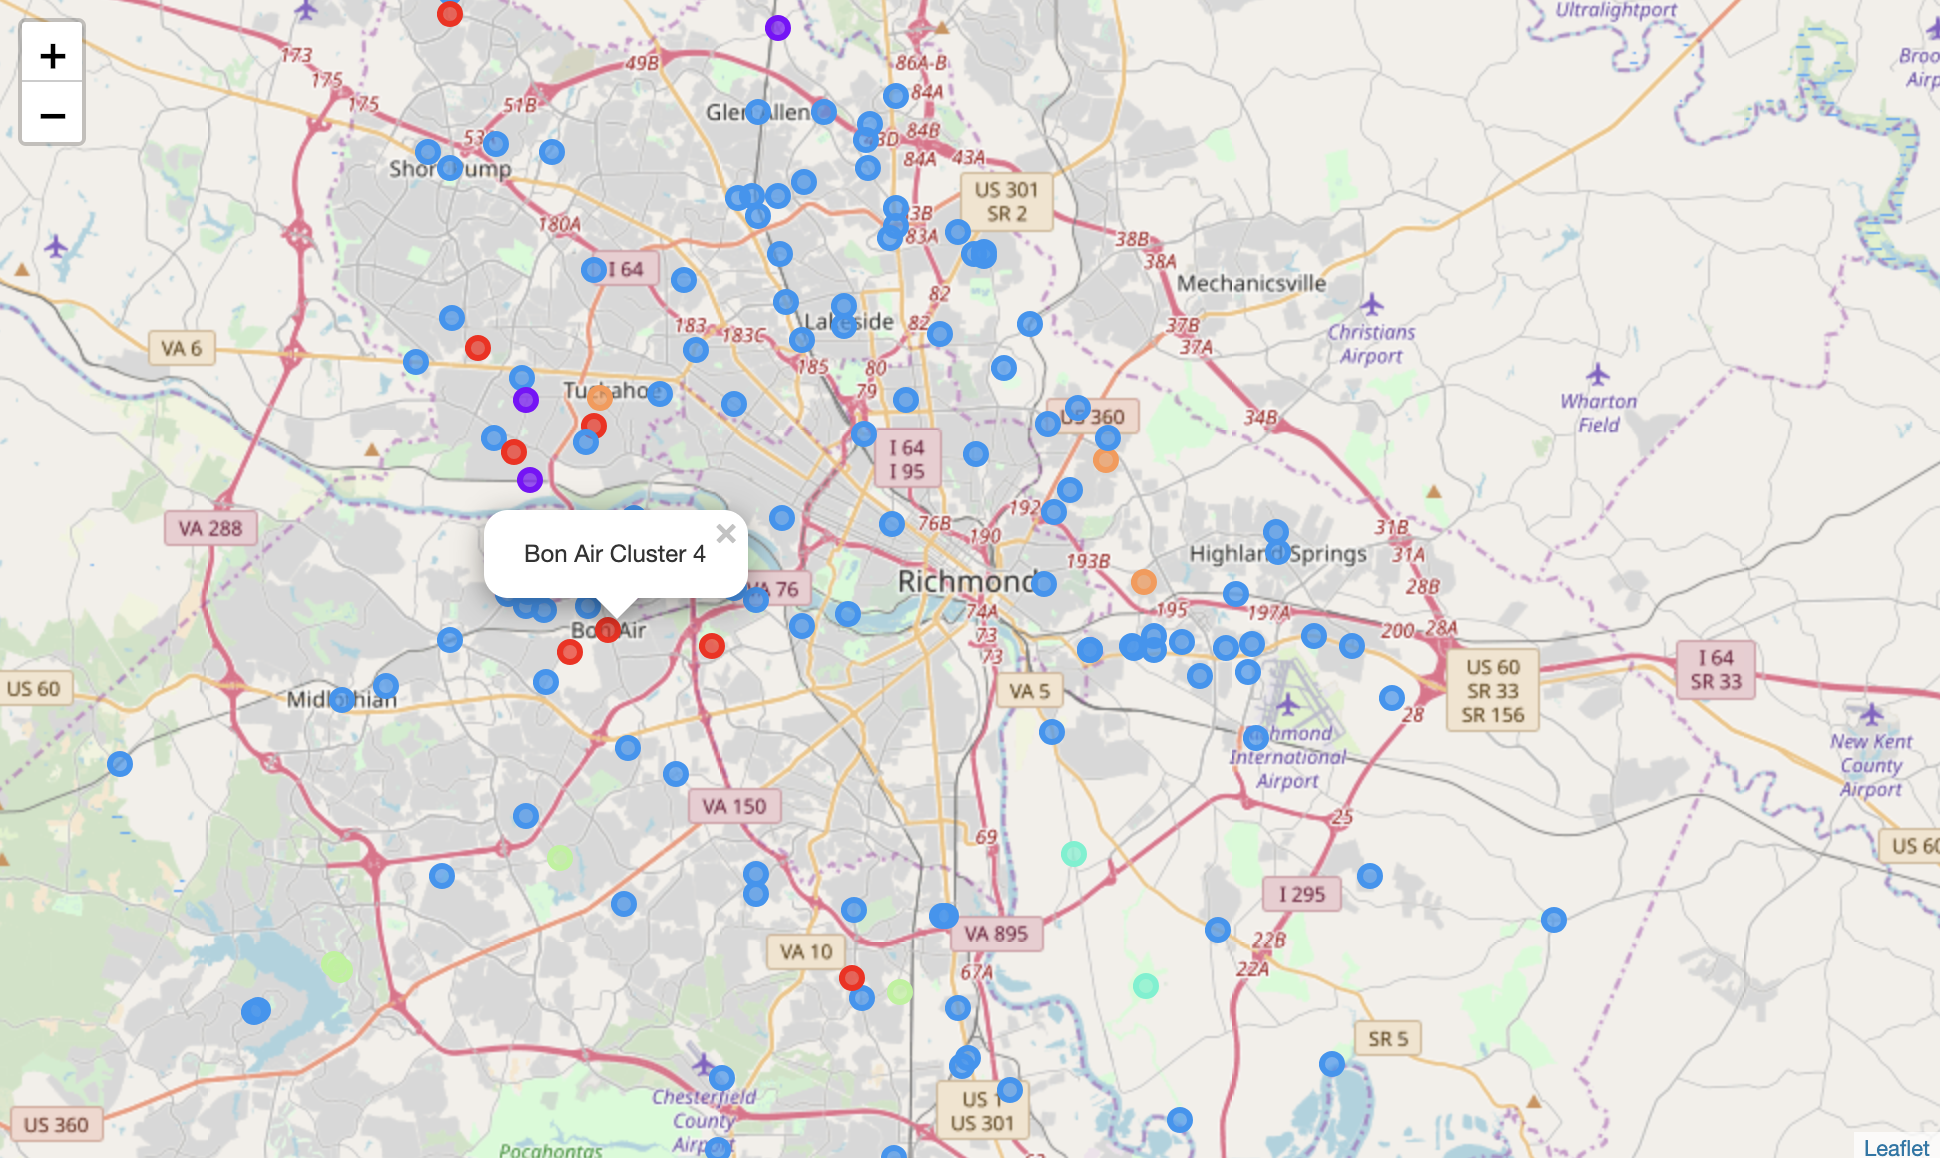

In [224]:
from IPython.display import Image
Image("RichmondClusters.png")

In [225]:
#showing data from the 1st cluster
df_area_venues_merged.loc[df_area_venues_merged['Cluster Labels'] == 0, df_area_venues_merged.columns[[2] + 
                                                            list(range(5, df_area_venues_merged.shape[1]))]]

Area  Cluster Labels  \
0                                        Beulah               0   
2                                        Laurel               0   
3                                    Mount Nebo               0   
4                                      Glendale               0   
5                                     Hallsboro               0   
6                                        Manbur               0   
7                                       Robious               0   
8                                Henrico County               0   
9                                      Bellwood               0   
10                               Bellwood Manor               0   
13                                    Cambridge               0   
15                                    Centralia               0   
16                                      Chester               0   
17                               Chimney Corner               0   
18                                    Crestview               0   
19                                  Deep Bottom               0   
20                            Deerfield Estates               0   
21                                 Dorset Woods               0   
23                                    Dutch Gap               0   
24                      Fort Brady (historical)               0   
26                                     Fort Lee               0   
27                                       Gayton               0   
29                                      Granite               0   
30                                  Gravel Hill               0   
31                                Holiday Hills               0   
32                            Jessup Farm Acres               0   
33                           Lake Crystal Farms               0   
34                               Longwood Acres               0   
36                                   Nottingham               0   
37                                      Oakland               0   
..                                          ...             ...   
115                            City of Richmond               0   
116                                  Manchester               0   
118                                     Wyndham               0   
119                                     Bensley               0   
120                                Chamberlayne               0   
121                                    Montrose               0   
122                            Bermuda District               0   
123                          Brookland District               0   
124                        Clover Hill District               0   
125                               Dale District               0   
126                         Midlothian District               0   
127                        Three Chopt District               0   
128                           Tuckahoe District               0   
129             Ettrick Census Designated Place               0   
130            Bellwood Census Designated Place               0   
131             Bensley Census Designated Place               0   
133        Chamberlayne Census Designated Place               0   
134             Chester Census Designated Place               0   
135  East Highland Park Census Designated Place               0   
136            Montrose Census Designated Place               0   
137          Glen Allen Census Designated Place               0   
138    Highland Springs Census Designated Place               0   
139            Lakeside Census Designated Place               0   
140              Laurel Census Designated Place               0   
141          Short Pump Census Designated Place               0   
147           Innsbrook Census Designated Place               0   
148                Enon Census Designated Place               0   
149            Woodlake Census Designated Place               0   
150                    

In [226]:
#showing data from the 2nd cluster
df_area_venues_merged.loc[df_area_venues_merged['Cluster Labels'] == 1, df_area_venues_merged.columns[[2] + 
                                                            list(range(5, df_area_venues_merged.shape[1]))]]

Area  Cluster Labels 1st Most Common Venue Type  \
25   Fort Harrison (historical)               1             History Museum   
42             Richmond Heights               1             History Museum   
67                 Chesterfield               1             History Museum   
117    Chesterfield Court House               1                   Pharmacy   

    2nd Most Common Venue Type 3rd Most Common Venue Type  \
25                 Yoga Studio                       Farm   
42                 Yoga Studio                       Farm   
67                    Pharmacy                Supermarket   
117             History Museum                Yoga Studio   

    4th Most Common Venue Type 5th Most Common Venue Type  \
25            Football Stadium                 Food Truck   
42            Football Stadium                 Food Truck   
67                Liquor Store                Yoga Studio   
117                       Farm                 Food Truck   

    6th Most Common Venue Type 7th Most Common Venue Type  \
25           Food & Drink Shop                       Food   
42           Food & Drink Shop                       Food   
67                        Farm          Food & Drink Shop   
117          Food & Drink Shop                       Food   

    8th Most Common Venue Type  ... 11th Most Common Venue Type  \
25                 Flower Shop  ...           Fish & Chips Shop   
42                 Flower Shop  ...           Fish & Chips Shop   
67                        Food  ...                 Fish Market   
117                Flower Shop  ...           Fish & Chips Shop   

    12th Most Common Venue Type 13th Most Common Venue Type  \
25         Fast Food Restaurant              Farmers Market   
42         Fast Food Restaurant              Farmers Market   
67            Fish & Chips Shop        Fast Food Restaurant   
117        Fast Food Restaurant              Farmers Market   

    14th Most Common Venue Type 15th Most Common Venue Type  \
25            Electronics Store         Fried Chicken Joint   
42            Electronics Store         Fried Chicken Joint   
67               Farmers Market           Electronics Store   
117                  Donut Shop           Electronics Store   

    16th Most Common Venue Type 17th Most Common Venue Type  \
25                   Donut Shop             Doctor's Office   
42                   Donut Shop             Doctor's Office   
67             Football Stadium                  Donut Shop   
117                      Forest             Doctor's Office   

    18th Most Common Venue Type 19th Most Common Venue Type  \
25               Discount Store                       Diner   
42               Discount Store                       Diner   
67              Doctor's Office              Discount Store   
117              Discount Store                       Diner   

    20th Most Common Venue Type  
25                 Dessert Shop  
42                 Dessert Shop  
67                        Diner  
117                Dessert Shop  

[4 rows x 22 columns]

In [227]:
#showing data from the 3rd cluster
df_area_venues_merged.loc[df_area_venues_merged['Cluster Labels'] == 2, df_area_venues_merged.columns[[2] + 
                                                            list(range(5, df_area_venues_merged.shape[1]))]]

Area  Cluster Labels  \
22                         Drewrys Bluff               2   
39                                Oxford               2   
63                             Rivermont               2   
113                          Brandermill               2   
144  Brandermill Census Designated Place               2   
146     Rockwood Census Designated Place               2   

     1st Most Common Venue Type 2nd Most Common Venue Type  \
22   Construction & Landscaping             Farmers Market   
39   Construction & Landscaping             Farmers Market   
63   Construction & Landscaping             Farmers Market   
113  Construction & Landscaping    Health & Beauty Service   
144  Construction & Landscaping             Mattress Store   
146  Construction & Landscaping             Farmers Market   

    3rd Most Common Venue Type 4th Most Common Venue Type  \
22                      Forest           Football Stadium   
39                      Forest           Football Stadium   
63                      Forest           Football Stadium   
113                       Farm           Football Stadium   
144                Golf Course                Yoga Studio   
146                     Forest           Football Stadium   

    5th Most Common Venue Type 6th Most Common Venue Type  \
22                  Food Truck          Food & Drink Shop   
39                  Food Truck          Food & Drink Shop   
63                  Food Truck          Food & Drink Shop   
113                 Food Truck          Food & Drink Shop   
144                     Forest                 Food Truck   
146                 Food Truck          Food & Drink Shop   

    7th Most Common Venue Type 8th Most Common Venue Type  ...  \
22                        Food                Flower Shop  ...   
39                        Food                Flower Shop  ...   
63                        Food                Flower Shop  ...   
113                       Food                Flower Shop  ...   
144          Food & Drink Shop                       Food  ...   
146                       Food                Flower Shop  ...   

    11th Most Common Venue Type 12th Most Common Venue Type  \
22            Fish & Chips Shop        Fast Food Restaurant   
39            Fish & Chips Shop        Fast Food Restaurant   
63            Fish & Chips Shop        Fast Food Restaurant   
113           Fish & Chips Shop        Fast Food Restaurant   
144                 Fish Market           Fish & Chips Shop   
146           Fish & Chips Shop        Fast Food Restaurant   

    13th Most Common Venue Type 14th Most Common Venue Type  \
22                  Yoga Studio         Fried Chicken Joint   
39                  Yoga Studio         Fried Chicken Joint   
63                  Yoga Studio         Fried Chicken Joint   
113              Farmers Market                 Yoga Studio   
144        Fast Food Restaurant              Farmers Market   
146                 Yoga Studio         Fried Chicken Joint   

    15th Most Common Venue Type 16th Most Common Venue Type  \
22            Electronics Store                  Donut Shop   
39            Electronics Store                  Donut Shop   
63            Electronics Store                  Donut Shop   
113                      Forest                  Donut Shop   
144                        Farm           Electronics Store   
146           Electronics Store                  Donut Shop   

    17th Most Common Venue Type 18th Most Common Venue Type  \
22              Doctor's Office              Discount Store   
39              Doctor's Office              Discount Store   
63              Doctor's Office              Discount Store   
113             Doctor's Office              Discount Store   
144                  Donut Shop             Doctor's Office   
146             Doctor's Office              Discount Store   

    19th Most Common Venue Type 20th Most Common Venue Type  
22                        Diner

In [228]:
#showing data from the 4th cluster
df_area_venues_merged.loc[df_area_venues_merged['Cluster Labels'] == 3, df_area_venues_merged.columns[[2] + 
                                                            list(range(5, df_area_venues_merged.shape[1]))]]

Area  Cluster Labels 1st Most Common Venue Type  \
44        Ziontown               3          Convenience Store   
93   Mayfair Place               3          Convenience Store   
110  Windsor Place               3         Seafood Restaurant   
114           Enon               3          Convenience Store   

    2nd Most Common Venue Type 3rd Most Common Venue Type  \
44                  Taco Place                Yoga Studio   
93         Fried Chicken Joint           Football Stadium   
110          Convenience Store                Yoga Studio   
114                     Lawyer                       Farm   

    4th Most Common Venue Type 5th Most Common Venue Type  \
44                        Farm                 Food Truck   
93                  Food Truck          Food & Drink Shop   
110                 Food Truck          Food & Drink Shop   
114           Football Stadium                 Food Truck   

    6th Most Common Venue Type 7th Most Common Venue Type  \
44           Food & Drink Shop                       Food   
93                        Food                Flower Shop   
110                       Food                Flower Shop   
114          Food & Drink Shop                       Food   

    8th Most Common Venue Type  ... 11th Most Common Venue Type  \
44                 Flower Shop  ...           Fish & Chips Shop   
93                 Flea Market  ...        Fast Food Restaurant   
110                Flea Market  ...        Fast Food Restaurant   
114                Flower Shop  ...           Fish & Chips Shop   

    12th Most Common Venue Type 13th Most Common Venue Type  \
44         Fast Food Restaurant              Farmers Market   
93               Farmers Market                        Farm   
110              Farmers Market                        Farm   
114        Fast Food Restaurant              Farmers Market   

    14th Most Common Venue Type 15th Most Common Venue Type  \
44            Electronics Store                      Forest   
93            Electronics Store                  Donut Shop   
110           Electronics Store                Concert Hall   
114           Electronics Store         Fried Chicken Joint   

    16th Most Common Venue Type 17th Most Common Venue Type  \
44                   Donut Shop             Doctor's Office   
93              Doctor's Office              Discount Store   
110                  Donut Shop             Doctor's Office   
114                  Donut Shop             Doctor's Office   

    18th Most Common Venue Type 19th Most Common Venue Type  \
44               Discount Store                       Diner   
93                        Diner                Dessert Shop   
110              Discount Store                       Diner   
114              Discount Store                       Diner   

    20th Most Common Venue Type  
44                 Dessert Shop  
93             Department Store  
110                Dessert Shop  
114                Dessert Shop  

[4 rows x 22 columns]

In [229]:
#showing data from the 5th cluster
df_area_venues_merged.loc[df_area_venues_merged['Cluster Labels'] == 4, df_area_venues_merged.columns[[2] + 
                                                            list(range(5, df_area_venues_merged.shape[1]))]]

Area  Cluster Labels  \
11                               Bon Air               4   
14                            Canterbury               4   
28                       Glenbrook Hills               4   
35                       Mooreland Farms               4   
55                      Westover Heights               4   
132      Bon Air Census Designated Place               4   
143      Wyndham Census Designated Place               4   
145  Meadowbrook Census Designated Place               4   

    1st Most Common Venue Type 2nd Most Common Venue Type  \
11                        Pool                       Farm   
14                        Pool                        Gym   
28                        Pool                 Playground   
35                        Pool                       Farm   
55                        Pool                      Trail   
132                       Pool                       Farm   
143                       Pool                        Gym   
145                       Pool                       Farm   

    3rd Most Common Venue Type 4th Most Common Venue Type  \
11            Football Stadium                 Food Truck   
14           Electronics Store                 Food Truck   
28           Electronics Store                 Food Truck   
35            Football Stadium                 Food Truck   
55           Electronics Store                 Food Truck   
132           Football Stadium                 Food Truck   
143          Electronics Store                 Food Truck   
145           Football Stadium                 Food Truck   

    5th Most Common Venue Type 6th Most Common Venue Type  \
11           Food & Drink Shop                       Food   
14           Food & Drink Shop                       Food   
28           Food & Drink Shop                       Food   
35           Food & Drink Shop                       Food   
55           Food & Drink Shop                       Food   
132          Food & Drink Shop                       Food   
143          Food & Drink Shop                       Food   
145          Food & Drink Shop                       Food   

    7th Most Common Venue Type 8th Most Common Venue Type  ...  \
11                 Flower Shop                Flea Market  ...   
14                 Flower Shop                Flea Market  ...   
28                 Flower Shop                Flea Market  ...   
35                 Flower Shop                Flea Market  ...   
55                 Flower Shop                Flea Market  ...   
132                Flower Shop                Flea Market  ...   
143                Flower Shop                Flea Market  ...   
145                Flower Shop                Flea Market  ...   

    11th Most Common Venue Type 12th Most Common Venue Type  \
11         Fast Food Restaurant              Farmers Market   
14         Fast Food Restaurant              Farmers Market   
28         Fast Food Restaurant              Farmers Market   
35         Fast Food Restaurant              Farmers Market   
55         Fast Food Restaurant              Farmers Market   
132        Fast Food Restaurant              Farmers Market   
143        Fast Food Restaurant              Farmers Market   
145        Fast Food Restaurant              Farmers Market   

    13th Most Common Venue Type 14th Most Common Venue Type  \
11                  Yoga Studio                      Forest   
14                         Farm                 Yoga Studio   
28                         Farm                  Donut Shop   
35                  Yoga Studio                      Forest   
55                         Farm                  Donut Shop   
132                 Yoga Studio                      Forest   
143                        Farm                 Yoga Studio   
145                 Yoga Studio                      Forest   

    15th Most Common Venue Type 16th Most Common Venue Type  \
11                   Donut Shop             Doctor'

In [230]:
#showing data from the 5th cluster
df_area_venues_merged.loc[df_area_venues_merged['Cluster Labels'] == 5, df_area_venues_merged.columns[[2] + 
                                                            list(range(5, df_area_venues_merged.shape[1]))]]

Area  Cluster Labels  \
1                              Hunton               5   
12                             Bosher               5   
142  Tuckahoe Census Designated Place               5   

    1st Most Common Venue Type 2nd Most Common Venue Type  \
1                         Food             Baseball Field   
12                        Food                Yoga Studio   
142                       Food      Outdoors & Recreation   

    3rd Most Common Venue Type 4th Most Common Venue Type  \
1                  Yoga Studio             Farmers Market   
12         Fried Chicken Joint           Football Stadium   
142                Yoga Studio                       Farm   

    5th Most Common Venue Type 6th Most Common Venue Type  \
1             Football Stadium                 Food Truck   
12                  Food Truck          Food & Drink Shop   
142                 Food Truck          Food & Drink Shop   

    7th Most Common Venue Type 8th Most Common Venue Type  ...  \
1            Food & Drink Shop                Flower Shop  ...   
12                 Flower Shop                Flea Market  ...   
142                Flower Shop                Flea Market  ...   

    11th Most Common Venue Type 12th Most Common Venue Type  \
1             Fish & Chips Shop        Fast Food Restaurant   
12         Fast Food Restaurant              Farmers Market   
142        Fast Food Restaurant              Farmers Market   

    13th Most Common Venue Type 14th Most Common Venue Type  \
1                          Farm         Fried Chicken Joint   
12                         Farm           Electronics Store   
142           Electronics Store                      Forest   

    15th Most Common Venue Type 16th Most Common Venue Type  \
1             Electronics Store                  Donut Shop   
12                   Donut Shop             Doctor's Office   
142                  Donut Shop             Doctor's Office   

    17th Most Common Venue Type 18th Most Common Venue Type  \
1               Doctor's Office              Discount Store   
12               Discount Store                       Diner   
142              Discount Store                       Diner   

    19th Most Common Venue Type 20th Most Common Venue Type  
1                         Diner                Dessert Shop  
12                 Dessert Shop            Department Store  
142                Dessert Shop            Department Store  

[3 rows x 22 columns]

In [231]:
# Code to drop the column 'Cluster Labels' from the dataframe - run as necessary
df_area_venues_sorted.drop('Cluster Labels', axis=1, inplace=True)

df_area_venues_sorted.head()

Area 1st Most Common Venue Type  \
0                              Acca                 Playground   
1                          Bellwood             Discount Store   
2  Bellwood Census Designated Place                      Motel   
3                    Bellwood Manor           Cuban Restaurant   
4                           Bensley        American Restaurant   

  2nd Most Common Venue Type 3rd Most Common Venue Type  \
0                   Platform                Coffee Shop   
1       Fast Food Restaurant           Insurance Office   
2        American Restaurant         Mexican Restaurant   
3                 Restaurant                      Diner   
4                Supermarket                Flea Market   

     4th Most Common Venue Type 5th Most Common Venue Type  \
0  General College & University                       Farm   
1             Convenience Store         Mexican Restaurant   
2      Mediterranean Restaurant  Latin American Restaurant   
3                Breakfast Spot                Yoga Studio   
4                    Donut Shop                Yoga Studio   

  6th Most Common Venue Type 7th Most Common Venue Type  \
0          Food & Drink Shop                       Food   
1         Chinese Restaurant               Carpet Store   
2       Fast Food Restaurant                     Forest   
3             Farmers Market                 Food Truck   
4             Farmers Market           Football Stadium   

  8th Most Common Venue Type 9th Most Common Venue Type  ...  \
0                Flower Shop                Flea Market  ...   
1          Fish & Chips Shop                Yoga Studio  ...   
2           Football Stadium                 Food Truck  ...   
3          Food & Drink Shop                       Food  ...   
4                 Food Truck          Food & Drink Shop  ...   

  11th Most Common Venue Type 12th Most Common Venue Type  \
0           Fish & Chips Shop        Fast Food Restaurant   
1           Food & Drink Shop                        Food   
2                        Food                 Flower Shop   
3                 Flea Market                 Fish Market   
4                 Flower Shop                 Fish Market   

  13th Most Common Venue Type 14th Most Common Venue Type  \
0              Farmers Market                  Donut Shop   
1                 Flower Shop                 Flea Market   
2                 Flea Market                 Fish Market   
3           Fish & Chips Shop        Fast Food Restaurant   
4           Fish & Chips Shop        Fast Food Restaurant   

  15th Most Common Venue Type 16th Most Common Venue Type  \
0           Electronics Store            Football Stadium   
1                 Fish Market           Electronics Store   
2           Fish & Chips Shop                 Yoga Studio   
3           Electronics Store                        Farm   
4                        Farm         Fried Chicken Joint   

  17th Most Common Venue Type 18th Most Common Venue Type  \
0             Doctor's Office              Discount Store   
1              Farmers Market                        Farm   
2         Fried Chicken Joint                        Farm   
3  Construction & Landscaping                  Donut Shop   
4           Electronics Store             Doctor's Office   

  19th Most Common Venue Type 20th Most Common Venue Type  
0                       Diner                Dessert Shop  
1                      Forest                  Donut Shop  
2           Electronics Store                  Donut Shop  
3             Doctor's Office              Discount Store  
4              Discount Store                       Diner  

[5 rows x 21 columns]

In [232]:
#Preparation of a summary table with the Area Name, Cluster information,Ranking of pools in the area and Pool Count.
# Starting with Area Name and Ranking of Pools amongst other Common Venues in the Area

x_max=df_area_venues_sorted.shape[1]
y_max=df_area_venues_sorted.shape[0]
print(x_max, y_max)

x=0
y=0
data = []
for y in range(x_max):
    for x in range(y_max):
      if (df_area_venues_sorted.iloc[x,y] == 'Pool'):
#           rank=rank+1
            data.append([df_area_venues_sorted.iloc[x,0], y])
            df_pool_ranking=pd.DataFrame(data)
            
#           print("Rank",rank ,"Area with Pools is :",df.iloc[x,0],"with a position of" ,y, "amongst 20 other leading venue categories")


df_pool_ranking.rename(columns={0: 'Area Name'},  inplace=True)
#dfd.rename(columns={1: 'Area Ranking for Opening Pool Equipment Store'},  inplace=True)
df_pool_ranking.rename(columns={1: 'Ranking of Pools amongst other Common Venues in the Area'},  inplace=True)

df_pool_ranking



21 151


Area Name  \
0                                Bon Air   
1        Bon Air Census Designated Place   
2                             Canterbury   
3                           Chamberlayne   
4   Chamberlayne Census Designated Place   
5                   Chamberlayne Heights   
6                        Glenbrook Hills   
7                                Granite   
8                            Gravel Hill   
9    Meadowbrook Census Designated Place   
10                       Mooreland Farms   
11                             Westbriar   
12                               Westham   
13                      Westover Heights   
14                               Wyndham   
15       Wyndham Census Designated Place   

    Ranking of Pools amongst other Common Venues in the Area  
0                                                   1         
1                                                   1         
2                                                   1         
3                                                   1         
4                                                   1         
5                                                   1         
6                                                   1         
7                                                   1         
8                                                   1         
9                                                   1         
10                                                  1         
11                                                  1         
12                                                  1         
13                                                  1         
14                                                  1         
15                                                  1

In [233]:
 df_pool_cnt

Pool Count
Area                                            
Bon Air                                        2
Bon Air Census Designated Place                1
Canterbury                                     1
Chamberlayne                                   1
Chamberlayne Census Designated Place           1
Chamberlayne Heights                           1
Glenbrook Hills                                2
Granite                                        1
Gravel Hill                                    1
Meadowbrook Census Designated Place            1
Mooreland Farms                                1
Westbriar                                      1
Westham                                        1
Westover Heights                               1
Wyndham                                        1
Wyndham Census Designated Place                1

In [234]:
# merge Pool Count with the Area Name , Ranking of Pools amongst other Common Venues in the Area
df_pool_cnt_rank_merged = df_pool_cnt


df_pool_cnt_rank_merged = df_pool_cnt_rank_merged.join(df_pool_ranking.set_index('Area Name'),on= 'Area')


df_pool_cnt_rank_merged.reset_index(inplace=True)

df_pool_cnt_rank_merged.rename(columns={'Area': 'Area Name'},  inplace=True)


df_pool_cnt_rank_merged=df_pool_cnt_rank_merged.sort_values(by=['Ranking of Pools amongst other Common Venues in the Area'])
df_pool_cnt_rank_merged

Area Name  Pool Count  \
0                                Bon Air           2   
1        Bon Air Census Designated Place           1   
2                             Canterbury           1   
3                           Chamberlayne           1   
4   Chamberlayne Census Designated Place           1   
5                   Chamberlayne Heights           1   
6                        Glenbrook Hills           2   
7                                Granite           1   
8                            Gravel Hill           1   
9    Meadowbrook Census Designated Place           1   
10                       Mooreland Farms           1   
11                             Westbriar           1   
12                               Westham           1   
13                      Westover Heights           1   
14                               Wyndham           1   
15       Wyndham Census Designated Place           1   

    Ranking of Pools amongst other Common Venues in the Area  
0                                                   1         
1                                                   1         
2                                                   1         
3                                                   1         
4                                                   1         
5                                                   1         
6                                                   1         
7                                                   1         
8                                                   1         
9                                                   1         
10                                                  1         
11                                                  1         
12                                                  1         
13                                                  1         
14                                                  1         
15                                                  1

In [235]:
#Merging Pool Count, anking and Cluster Labels with the  df_area_venues_merged dataframe 
#to get a master dataframe with all columns
df_pool_cnt_rank_cluster_merged = df_pool_cnt_rank_merged

# merge and add latitude/longitude for each neighborhood
df_pool_cnt_rank_cluster_merged = df_pool_cnt_rank_cluster_merged.join(df_area_venues_merged.set_index('Area'), on='Area Name')

df_pool_cnt_rank_cluster_merged # check the last columns!

Area Name  Pool Count  \
0                                Bon Air           2   
1        Bon Air Census Designated Place           1   
2                             Canterbury           1   
3                           Chamberlayne           1   
4   Chamberlayne Census Designated Place           1   
5                   Chamberlayne Heights           1   
6                        Glenbrook Hills           2   
7                                Granite           1   
8                            Gravel Hill           1   
9    Meadowbrook Census Designated Place           1   
10                       Mooreland Farms           1   
11                             Westbriar           1   
12                               Westham           1   
13                      Westover Heights           1   
14                               Wyndham           1   
15       Wyndham Census Designated Place           1   

    Ranking of Pools amongst other Common Venues in the Area State  \
0                                                   1           VA   
1                                                   1           VA   
2                                                   1           VA   
3                                                   1           VA   
4                                                   1           VA   
5                                                   1           VA   
6                                                   1           VA   
7                                                   1           VA   
8                                                   1           VA   
9                                                   1           VA   
10                                                  1           VA   
11                                                  1           VA   
12                                                  1           VA   
13                                                  1           VA   
14                                                  1           VA   
15                                                  1           VA   

             County   Latitude  Longitude  Cluster Labels  \
0      Chesterfield  37.524870 -77.557765               4   
1      Chesterfield  37.518740 -77.571245               4   
2           Henrico  37.601813 -77.602489               4   
3           Henrico  37.626534 -77.428594               0   
4           Henrico  37.628024 -77.428847               0   
5           Henrico  37.627367 -77.432205               0   
6           Henrico  37.580424 -77.562765               4   
7   Richmond (city)  37.532925 -77.507208               0   
8   Richmond (city)  37.536536 -77.514708               0   
9      Chesterfield  37.430121 -77.473952               4   
10          Henrico  37.573480 -77.590544               4   
11          Henrico  37.623201 -77.562487               0   
12          Henrico  37.589035 -77.539987               0   
13     Chesterfield  37.520425 -77.522208               4   
14          Henrico  37.698478 -77.612488               0   
15          Henrico  37.692442 -77.612318               4   

   1st Most Common Venue Type 2nd Most Common Venue Type  ...  \
0                        Pool                       Farm  ...   
1                        Pool                       Farm  ...   
2                        Pool                        Gym  ...   
3                        Pool             Baseball Field  ...   
4                        Pool             Baseball Field  ...   
5                        Pool                    Theater  ...   
6                        Pool                 Playground  ...   
7                        Pool             History Museum  ...   
8                        Pool        American Restaurant  ...   
9                        Pool                       Farm  ...   
10                       Pool                       Farm  ...   
11                       Pool                   Pharmacy  ...   
12  

In [236]:
#Select the relevant columns from the master dataframe for the results discussion and conclusion analysis.
df_pool_selection=df_pool_cnt_rank_cluster_merged[['Area Name', 'Cluster Labels', 'Ranking of Pools amongst other Common Venues in the Area','Pool Count']]
df_pool_selection=df_pool_selection.sort_values(by=['Cluster Labels'])
df_pool_selection=df_pool_selection.sort_values(by=['Pool Count'], ascending=False)
df_pool_selection.reset_index(drop=True, inplace=True)
df_pool_selection


Area Name  Cluster Labels  \
0                                Bon Air               4   
1                        Glenbrook Hills               4   
2                           Chamberlayne               0   
3   Chamberlayne Census Designated Place               0   
4                   Chamberlayne Heights               0   
5                                Granite               0   
6                            Gravel Hill               0   
7                              Westbriar               0   
8                                Westham               0   
9                                Wyndham               0   
10       Bon Air Census Designated Place               4   
11                            Canterbury               4   
12   Meadowbrook Census Designated Place               4   
13                       Mooreland Farms               4   
14                      Westover Heights               4   
15       Wyndham Census Designated Place               4   

    Ranking of Pools amongst other Common Venues in the Area  Pool Count  
0                                                   1                  2  
1                                                   1                  2  
2                                                   1                  1  
3                                                   1                  1  
4                                                   1                  1  
5                                                   1                  1  
6                                                   1                  1  
7                                                   1                  1  
8                                                   1                  1  
9                                                   1                  1  
10                                                  1                  1  
11                                                  1                  1  
12                                                  1                  1  
13                                                  1                  1  
14                                                  1                  1  
15                                                  1                  1

In [237]:
#Rename the Cluster Labels from Numerals to relevant Cluster Names based on type of Venues the the Cluster most represent
#to form the Final Pool Selection Criteria Dataset
df_pool_selection=df_pool_selection.replace({'Cluster Labels': {4: 'Pool Cluster', 0: 'Restaurant Cluster'}})
df_pool_selection

Area Name      Cluster Labels  \
0                                Bon Air        Pool Cluster   
1                        Glenbrook Hills        Pool Cluster   
2                           Chamberlayne  Restaurant Cluster   
3   Chamberlayne Census Designated Place  Restaurant Cluster   
4                   Chamberlayne Heights  Restaurant Cluster   
5                                Granite  Restaurant Cluster   
6                            Gravel Hill  Restaurant Cluster   
7                              Westbriar  Restaurant Cluster   
8                                Westham  Restaurant Cluster   
9                                Wyndham  Restaurant Cluster   
10       Bon Air Census Designated Place        Pool Cluster   
11                            Canterbury        Pool Cluster   
12   Meadowbrook Census Designated Place        Pool Cluster   
13                       Mooreland Farms        Pool Cluster   
14                      Westover Heights        Pool Cluster   
15       Wyndham Census Designated Place        Pool Cluster   

    Ranking of Pools amongst other Common Venues in the Area  Pool Count  
0                                                   1                  2  
1                                                   1                  2  
2                                                   1                  1  
3                                                   1                  1  
4                                                   1                  1  
5                                                   1                  1  
6                                                   1                  1  
7                                                   1                  1  
8                                                   1                  1  
9                                                   1                  1  
10                                                  1                  1  
11                                                  1                  1  
12                                                  1                  1  
13                                                  1                  1  
14                                                  1                  1  
15                                                  1                  1

In [238]:
df_pool_selection_final= df_pool_selection.sort_values(by=['Cluster Labels'])
df_pool_selection_final.reset_index(drop=True, inplace=True)
df_pool_selection_final

Area Name      Cluster Labels  \
0                                Bon Air        Pool Cluster   
1                        Glenbrook Hills        Pool Cluster   
2        Bon Air Census Designated Place        Pool Cluster   
3                             Canterbury        Pool Cluster   
4    Meadowbrook Census Designated Place        Pool Cluster   
5                        Mooreland Farms        Pool Cluster   
6                       Westover Heights        Pool Cluster   
7        Wyndham Census Designated Place        Pool Cluster   
8                           Chamberlayne  Restaurant Cluster   
9   Chamberlayne Census Designated Place  Restaurant Cluster   
10                  Chamberlayne Heights  Restaurant Cluster   
11                               Granite  Restaurant Cluster   
12                           Gravel Hill  Restaurant Cluster   
13                             Westbriar  Restaurant Cluster   
14                               Westham  Restaurant Cluster   
15                               Wyndham  Restaurant Cluster   

    Ranking of Pools amongst other Common Venues in the Area  Pool Count  
0                                                   1                  2  
1                                                   1                  2  
2                                                   1                  1  
3                                                   1                  1  
4                                                   1                  1  
5                                                   1                  1  
6                                                   1                  1  
7                                                   1                  1  
8                                                   1                  1  
9                                                   1                  1  
10                                                  1                  1  
11                                                  1                  1  
12                                                  1                  1  
13                                                  1                  1  
14                                                  1                  1  
15                                                  1                  1